> La validación de datos es un primer paso importante en EDA

Podemos utilizar el atributo DataFrame.dtypes si solo nos interesan los tipos de datos de las columnas.

In [1]:
import pandas as pd
from matplotlib.pyplot import errorbar

books = pd.read_csv('../../data/Books.csv')
books.dtypes

title             object
author            object
pages             object
genre             object
description       object
published_date    object
publisher         object
language          object
average_rating    object
ratings_count      int64
thumbnail         object
dtype: object

# Updating data types
Podemos utilizar el método DataFrame.astype() para convertir una columna a un tipo de datos diferente
| Tipo pandas      | Descripción                   | Ejemplo           |
|------------------|------------------------------|-------------------|
| int64            | Entero de 64 bits             | 1, 42, -7         |
| float64          | Decimal de 64 bits            | 3.14, -0.001      |
| bool             | Booleano                      | True, False       |
| object           | Cadena de texto (string)      | "libro", "abc"    |
| category         | Categórico                    | "A", "B", "C"     |
| datetime64[ns]   | Fecha y hora                  | 2024-06-01        |
| timedelta64[ns]  | Diferencia de tiempo          | 2 days, 5 hours   |
| Int64            | Entero de 64 bits (nullable)  | 1, <NA>           |
| Float64          | Decimal de 64 bits (nullable) | 3.14, <NA>        |
| string           | Cadena de texto (nullable)    | "texto", <NA>     |

In [7]:
books = books[books['pages'] != 'Unknown']
books['pages'] = books['pages'].astype('Int64')
books.dtypes

title             object
author            object
pages              Int64
genre             object
description       object
published_date    object
publisher         object
language          object
average_rating    object
ratings_count      int64
thumbnail         object
dtype: object

Podemos validar datos categóricos comparando valores de una columna con una lista de valores permitidos.

In [14]:
books = books[books['genre'].isin(['Fiction','Biography'])]
books['genre'].value_counts()

genre
Fiction      242
Biography      3
Name: count, dtype: int64

Podemos seleccionar y ver solo las columnas numéricas en un DataFrame llamando al metodo select dtypes.

In [15]:
books.select_dtypes(include='number').head()

,pages,ratings_count
4,248,0
27,526,0
86,2131,0
95,222,0
97,490,0


Podemos sacar maximos y minimos de columnas numéricas usando los métodos DataFrame.max() y DataFrame.min().

In [16]:
books['pages'].max()

np.int64(8114)

In [17]:
books['pages'].min()

np.int64(8)

Podemos ver una imagen más detallada de la distribución de los datos del año utilizando la función de diagrama de cajas de Seaborn.

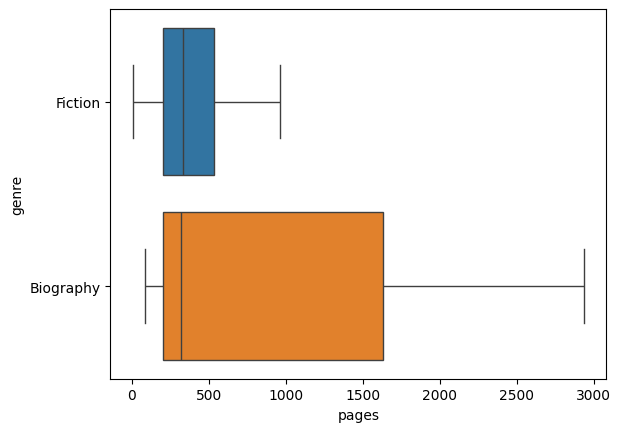

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='pages',
            data=books,
            showfliers=False,
            y = 'genre',
            hue = 'genre')
plt.show()

El operador `~` en pandas se utiliza para negar una condición booleana. Por ejemplo, si tienes un filtro y quieres seleccionar los valores que no cumplen la condición, puedes usar `~` delante de la expresión.